# Chapter 1. Exploratory Data Analysis

### Elements of Structured Data


#### KEY TERMS FOR DATA TYPES

#### KEY IDEAS

### Rectangular Data

#### KEY TERMS FOR RECTANGULAR DATA

### Estimates of Location

#### KEY TERMS FOR ESTIMATES OF LOCATION

In [7]:
fold_path  = r'C:\Users\966317\Desktop\statistics-for-data-scientists-master\statistics-for-data-scientists\data'
import os
state_file_path = os.path.join(fold_path,'state.csv')

In [10]:
import pandas as pd
df_state = pd.read_csv(state_file_path)

##### Finding Mean

In [11]:
import numpy as np
# 2 ways to find mean are
np.mean(df_state['Population']),df_state['Population'].mean()

(6162876.3, 6162876.3)

##### Finding Trimmed mean

In [12]:
from scipy.stats import trim_mean
trim_mean(df_state['Population'],0.1)

4783697.125

##### Finding Median

In [13]:
from numpy import median
median(df_state['Population'])

4436369.5

##### Finding Weighted mean

In [14]:
from numpy import average
average(df_state['Murder.Rate'], weights=df_state['Population'])

4.4458339811233927

##### Finding Weighted median

In [18]:
import weightedstats as ws
ws.weighted_median(df_state['Murder.Rate'], weights=df_state['Population'])

4.4000000000000004

##### KEY IDEAS

### Estimates of Variability

##### KEY TERMS FOR VARIABILITY METRICS

##### Finding Standard Deviation

In [20]:
from numpy import std
std(df_state[["Population"]])

Population    6.779407e+06
dtype: float64

##### Finding IQR

In [21]:
from scipy.stats import iqr
iqr(df_state[["Population"]])

4847308.0

##### Finding Mean absolute deviation

In [33]:
from numpy import mean, absolute

def mean_ad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)
mean_ad(df_state["Population"].values)

4450933.3560000006

In [34]:
df_state["Population"].mad()

4450933.356000001

##### Finding Median absolute deviation

In [37]:
from numpy import median, absolute

def median_ad(data, axis=None):
    return median(absolute(data - mean(data, axis)), axis)
median_ad(df_state["Population"].values)

3430658.2999999998

In [38]:
from astropy.stats import median_absolute_deviation
median_absolute_deviation(df_state["Population"].values)

2596702.0

##### KEY IDEAS

### Exploring the Data Distribution

##### KEY TERMS FOR EXPLORING THE DISTRIBUTION

##### Percentile

In [41]:
df_state['Murder.Rate'].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

##### Boxplot

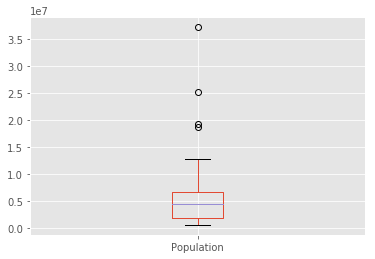

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df_state["Population"].plot(kind='box')

##### Frequency Table

In [69]:
breaks = pd.cut(np.array(df_state["Population"]), 11, right=True, include_lowest=True)
breaks.value_counts()

[526935.67, 3899110.545]        24
(3899110.545, 7234595.0909]     14
(7234595.0909, 10570079.636]     5
(10570079.636, 13905564.182]     3
(13905564.182, 17241048.727]     0
(17241048.727, 20576533.273]     2
(20576533.273, 23912017.818]     0
(23912017.818, 27247502.364]     1
(27247502.364, 30582986.909]     0
(30582986.909, 33918471.455]     0
(33918471.455, 37253956]         1
dtype: int64

### Histogram

In [68]:
breaks.categories
# plt.hist(breaks)

Index([u'(526935.67, 3899110.545]', u'(3899110.545, 7234595.0909]',
       u'(7234595.0909, 10570079.636]', u'(10570079.636, 13905564.182]',
       u'(13905564.182, 17241048.727]', u'(17241048.727, 20576533.273]',
       u'(20576533.273, 23912017.818]', u'(23912017.818, 27247502.364]',
       u'(27247502.364, 30582986.909]', u'(30582986.909, 33918471.455]',
       u'(33918471.455, 37253956]'],
      dtype='object')